In [213]:
%matplotlib inline
import torch
from PIL import Image
import numpy as np
from PIL import ImageGrab
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import random

Set the device between CUDA and CPU depending on device

In [214]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

Load the model and prepare it for inference

In [215]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

Using cache found in /Users/aditya/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-12 Python-3.9.16 torch-2.0.0 CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


Load the image (LINK TO OPEN-CV)

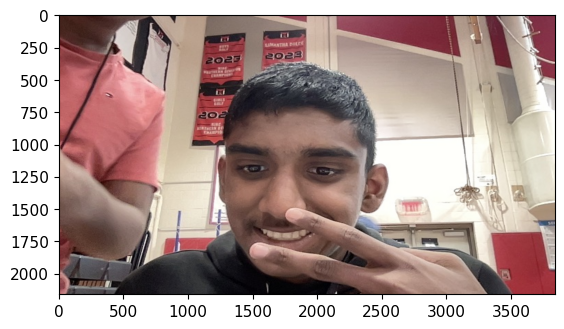

In [216]:
imagename = "badphoto.jpeg"
img = np.array(Image.open(imagename).resize((3840,2160)).convert("RGB"))
plt.imshow(img)

Run inferfence on the image and curate results

In [217]:
results = model([img])

Filter results from garbage

In [218]:
results.print()
results.save()
results.xyxy[0]
result = results.pandas().xyxy[0]

image 1/1: 2160x3840 2 persons, 2 chairs, 1 scissors
Speed: 2.0ms pre-process, 1005.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp10


Assembling the prices dictionary

In [219]:
prices = {
    40: 1.49,
    43: 0.15,
    44: 0.15,
    45: 0.15,
    50: 0.50,
    54: 1.25,
    68: 399.99,
    74: 24.99,
    77: 4.99,
    78: 14.99,
    80: 1.25
}

Create the annotated view

person
person
chair
scissors
chair


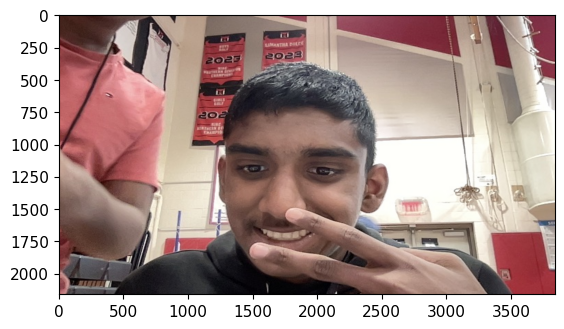

In [220]:
img = np.array(Image.open(imagename).resize((3840,2160)).convert("RGB"))
fig, ax = plt.subplots()
ax.imshow(img)

for x in range(len(result["xmin"])):
    if result["class"][x].item() in prices.keys():
        rect = patches.Rectangle((result["xmin"][x], result["ymin"][x]), result["xmax"][x] - result["xmin"][x], result["ymax"][x] - result["ymin"][x], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        #ax.text(result["xmax"][x], result["ymin"][x], result["name"][x],bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

plt.savefig("annotatedoutput.png")


Assembling the files to be shipped

In [221]:
with open("itemsrecognized.txt", "w") as out1, open("prices.txt", "w") as out2:
    out1.truncate(0)
    out2.truncate(0)
    for x in range(len(result["xmin"])):
        if result["class"][x].item() in prices.keys():
            out1.write(str(result["name"][x]) + "\n")
            out2.write(str(prices[result["class"][x].item()]) + "\n")